In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/St_yolov5
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/St_yolov5
/content/drive/MyDrive/St_yolov5


In [ ]:

!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:

%cd yolov5

/content/drive/MyDrive/St_yolov5/yolov5


In [ ]:

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

In [ ]:
%cat /content/drive/MyDrive/Strawberry_yolov8/dataset.yaml

train: /content/drive/MyDrive/Strawberry_yolov8/dataset/train
val: /content/drive/MyDrive/Strawberry_yolov8/dataset/val
nc: 7
names: ["Angular Leafspot", "Anthracnose Fruit Rot", "Blossom Blight", "Gray Mold", "Leaf Spot", "Powdery Mildew Fruit", "Powdery Mildew Leaf"]

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 448 --batch 128 --epochs 100 --data /content/drive/MyDrive/Strawberry_yolov8/dataset.yaml --weights yolov5s-seg.pt --name 100-epochs

/content/drive/MyDrive/St_yolov5/yolov5
2024-04-10 05:13:30.534448: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 05:13:30.534497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 05:13:30.536377: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/drive/MyDrive/Strawberry_yolov8/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=448, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, de

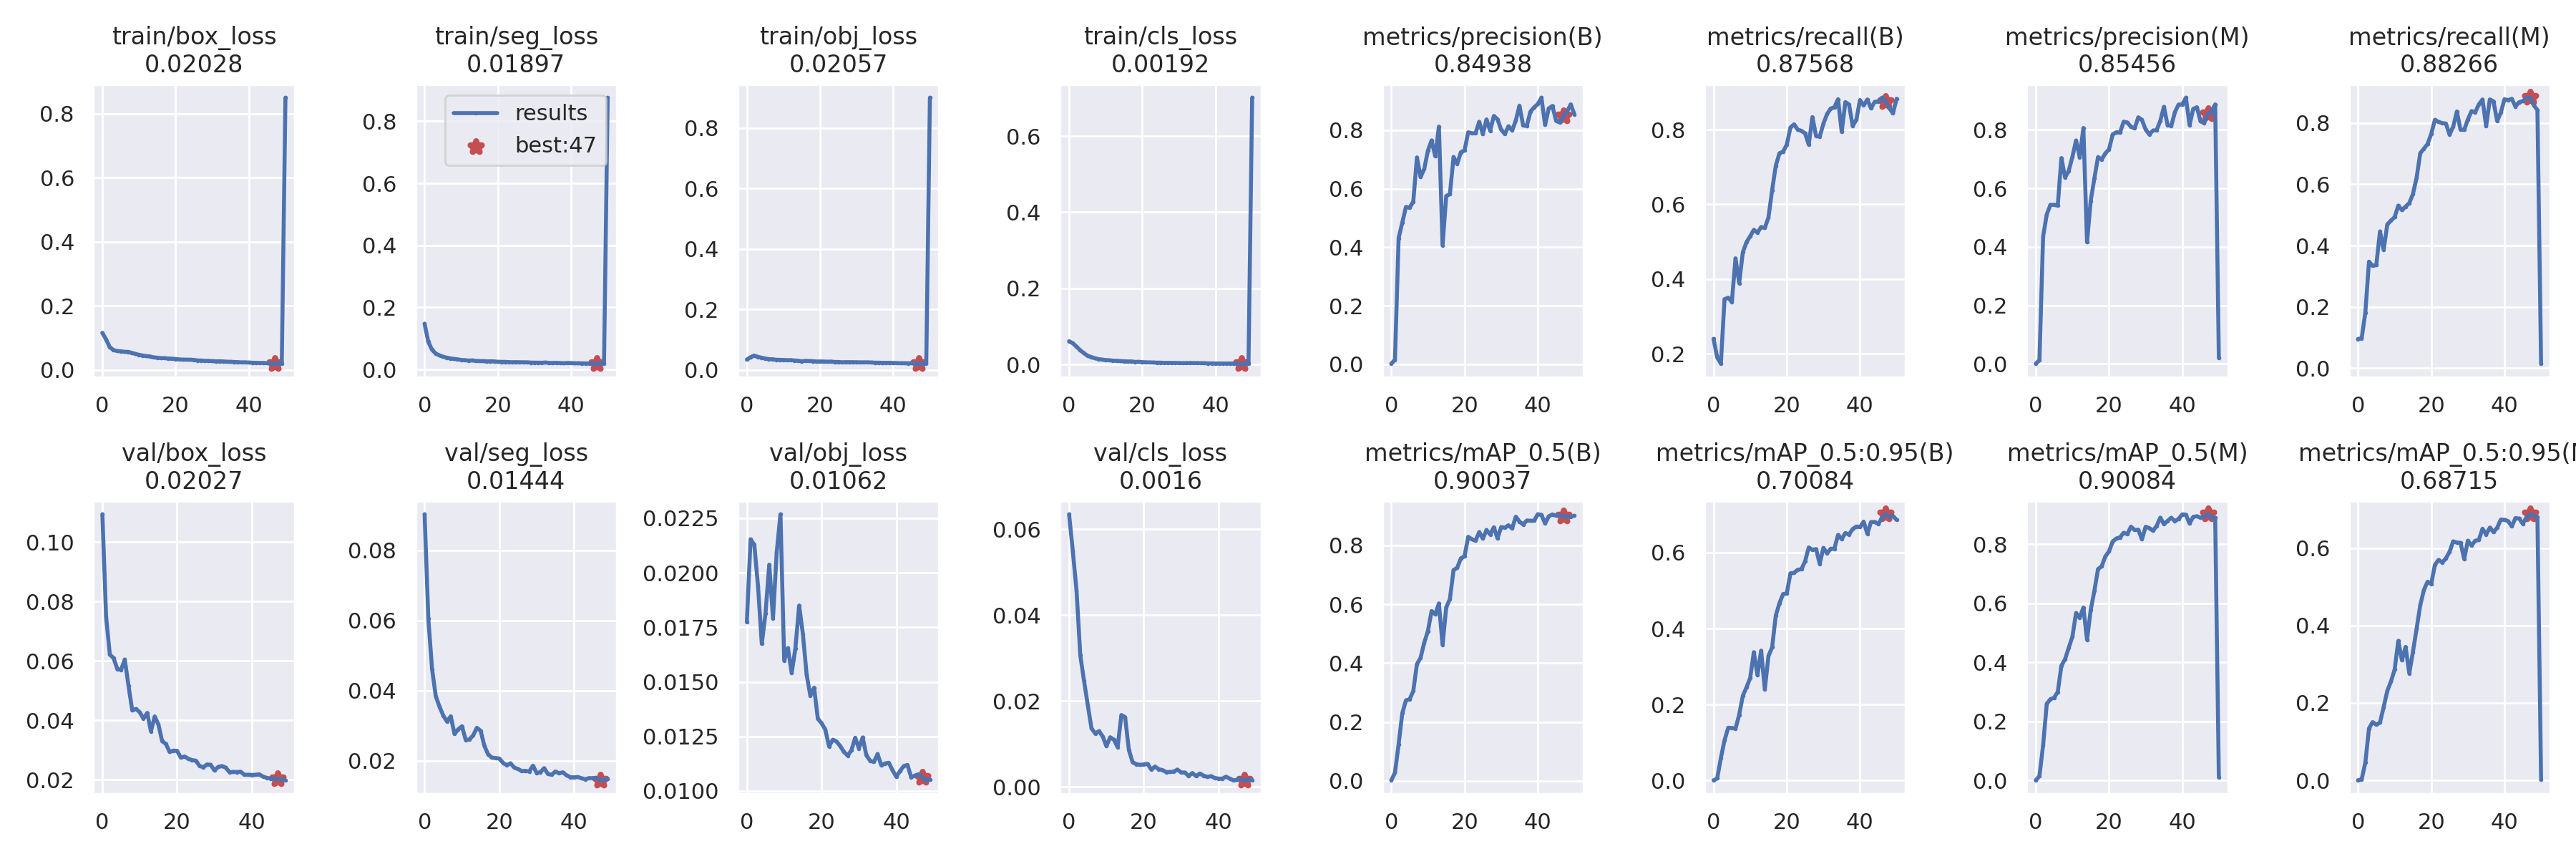

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

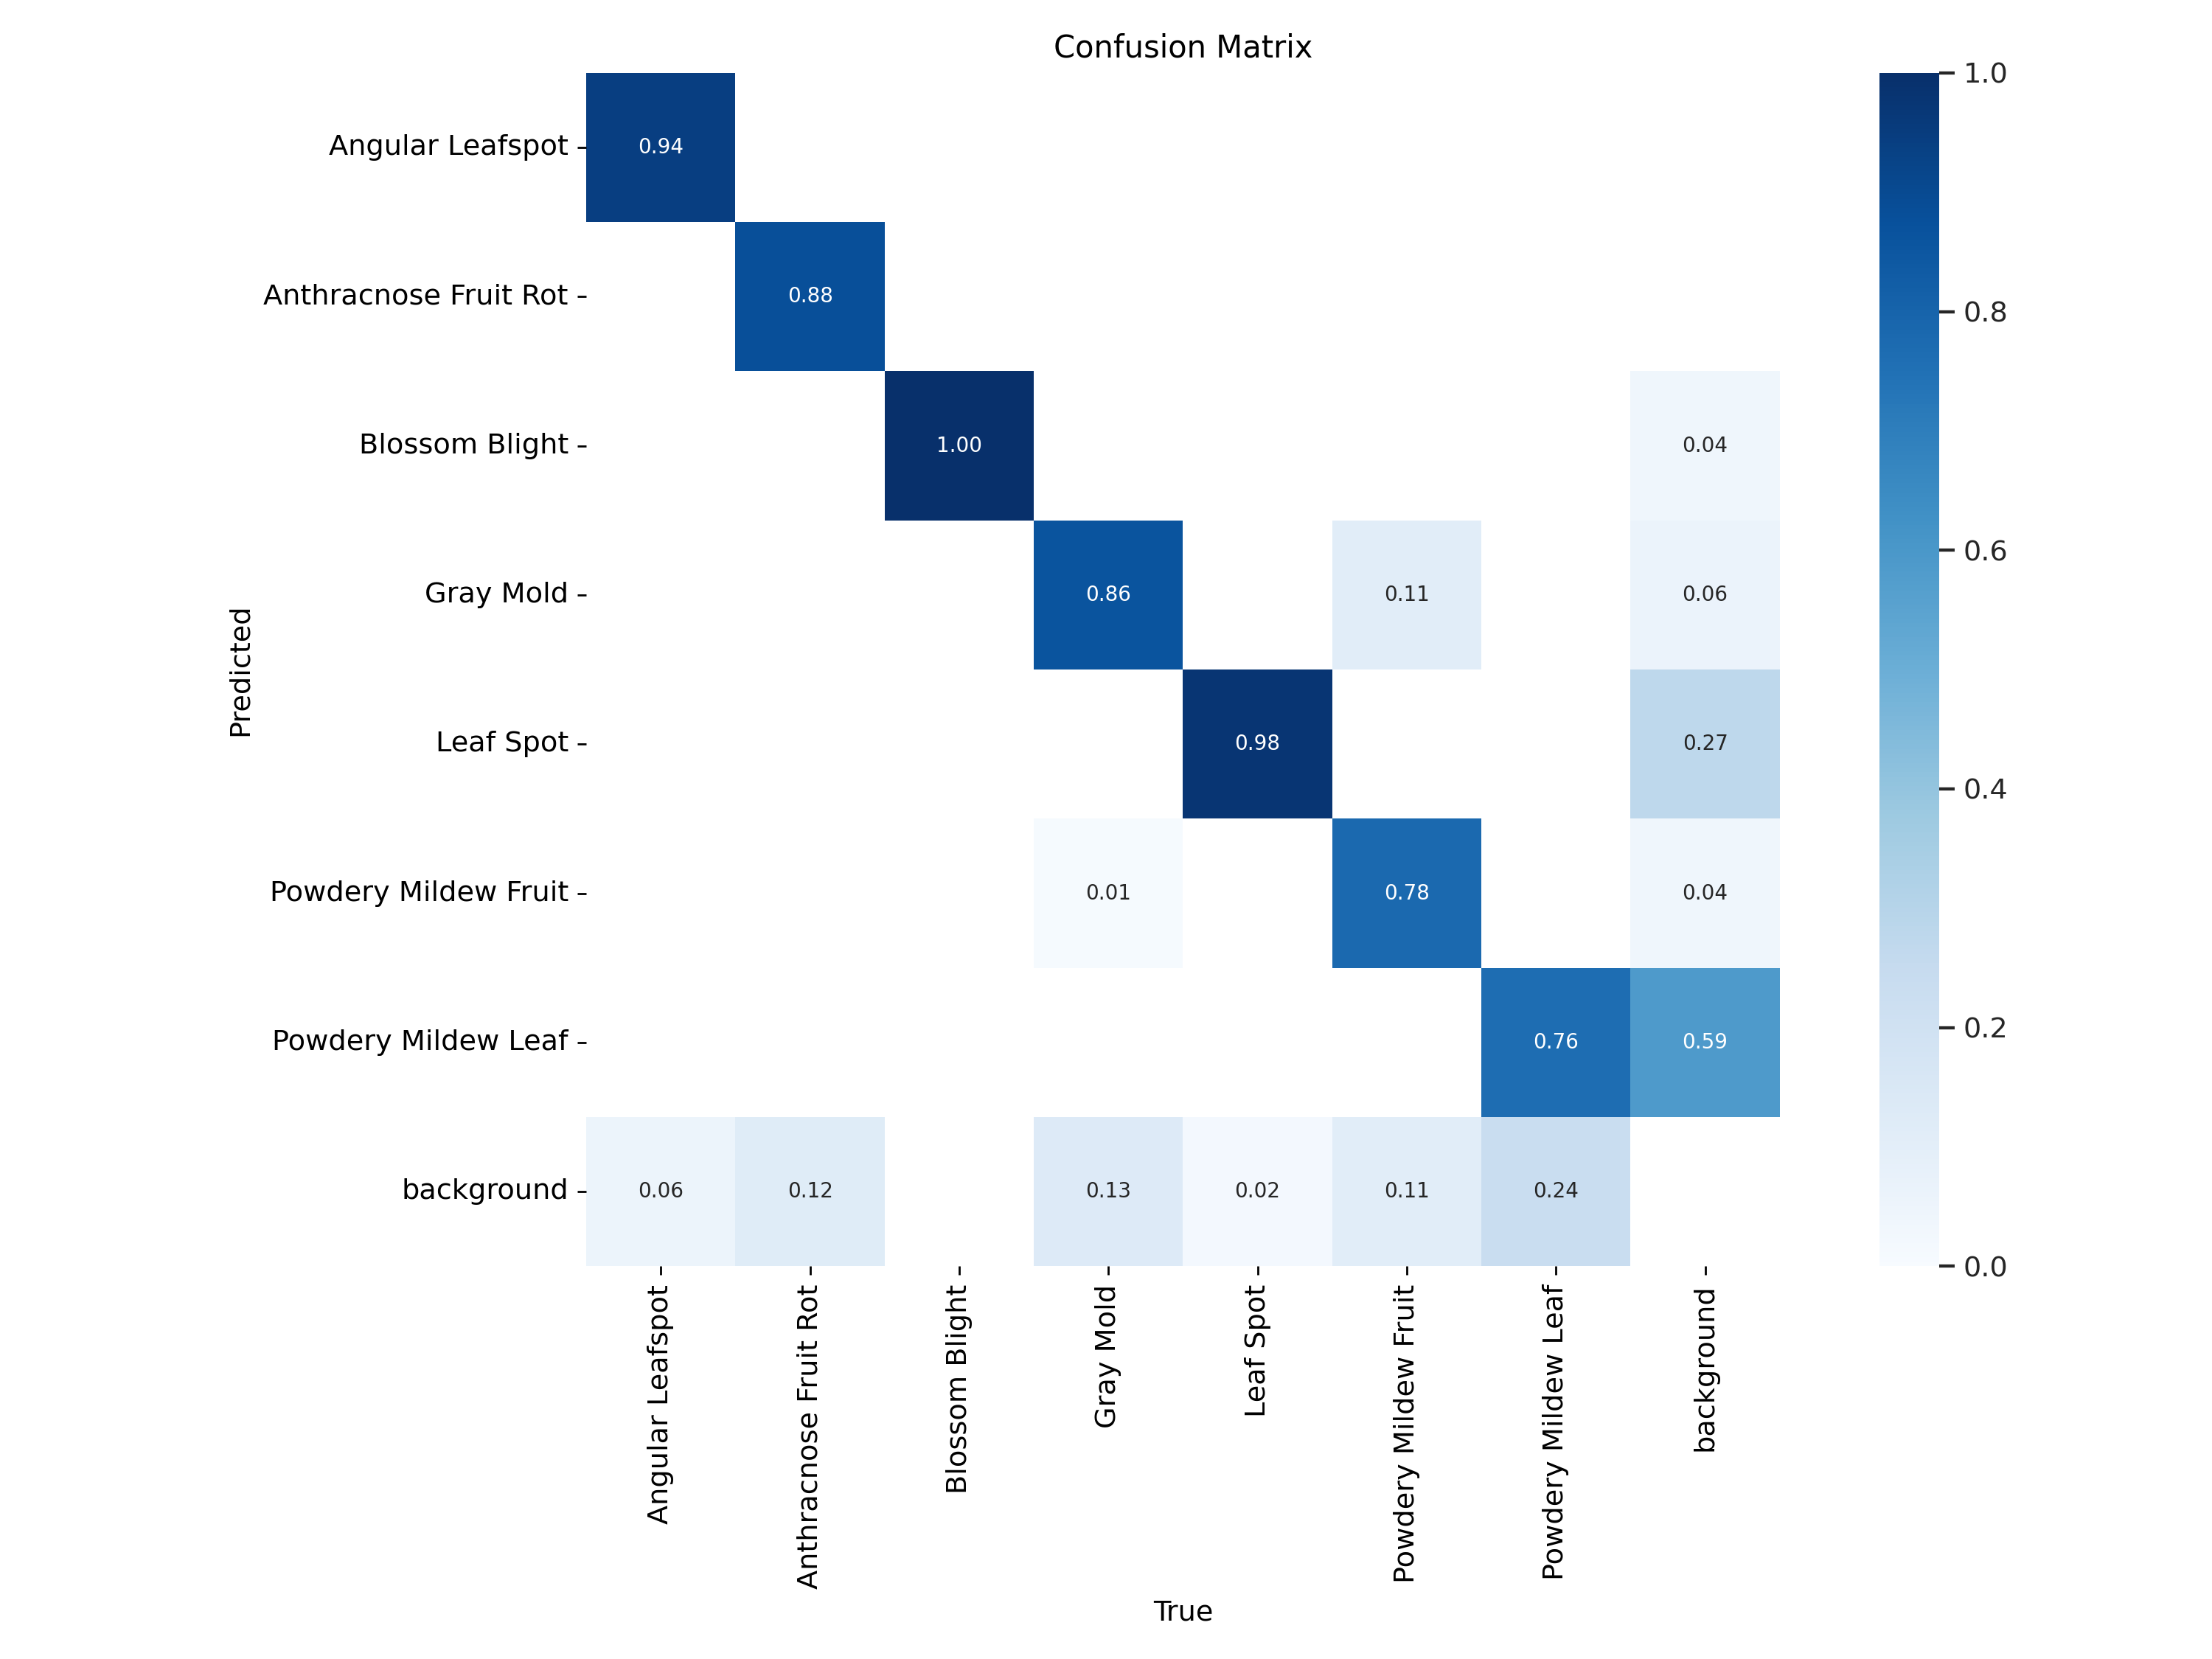

In [ ]:
display.Image(filename=f'/content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/confusion_matrix.png',width=1200)

In [ ]:
# validation
%cd {HOME}/yolov5
!python segment/val.py --weights /content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt --data /content/drive/MyDrive/Strawberry_yolov8/dataset.yaml --img 448  --name 100-epochs2

/content/drive/MyDrive/St_yolov5/yolov5
segment/val: data=/content/drive/MyDrive/Strawberry_yolov8/dataset.yaml, weights=['/content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt'], batch_size=32, imgsz=448, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=100-epochs2, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7414604 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/drive/MyDrive/Strawberry_yolov8/dataset/val/labels.cache... 307 images, 11 backgrounds, 0 corrupt: 100% 318/318 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithr

In [ ]:
# !python segment/predict.py --source /content/drive/MyDrive/Strawberry_yolov8/dataset/test/images/2488c55a55da06abeb3129dc7f9ff83a.png  --weights /content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt

segment/predict: weights=['/content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt'], source=/content/drive/MyDrive/Strawberry_yolov8/dataset/test/images/2488c55a55da06abeb3129dc7f9ff83a.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7414604 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/drive/MyDrive/Strawberry_yolov8/dataset/test/images/2488c55a55da06abeb3129dc7f9ff83a.png: 640x640 1 Blossom Blight, 15.0ms
Speed: 2.2ms pre-process, 15.0ms infere

segment/predict: weights=['/content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/drive/MyDrive/R2-input.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7414604 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/drive/MyDrive/R2-input.jpg: 640x640 7 Powdery Mildew Leafs, 14.9ms
Speed: 0.7ms pre-process, 14.9ms inference, 516.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/exp6


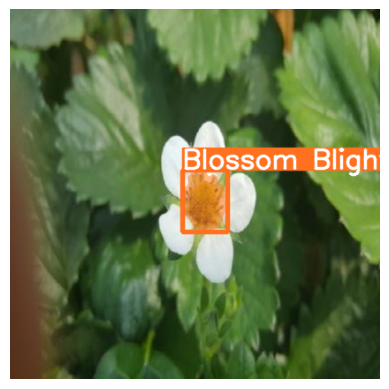

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Run prediction
!python segment/predict.py --source /content/drive/MyDrive/R2-input.jpg --weights /content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/custom-dataset/weights/best.pt

# Load the predicted image
predicted_image = cv2.imread("/content/drive/MyDrive/St_yolov5/yolov5/runs/predict-seg/exp3/2488c55a55da06abeb3129dc7f9ff83a.png")

# Convert BGR image to RGB
predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

# Display the predicted image using matplotlib
plt.imshow(predicted_image)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
!python export.py --include tflite --imgsz 448 --weights /content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt'], imgsz=[448], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 165 layers, 7414604 parameters, 0 gradients, 25.7 GFLOPs

PyTorch: starting from /content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/100-epochs2/weights/best.pt with output shape (1, 12348, 44) (14.4 MB)
2024-04-11 11:24:23.652417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 11:24:23.652489: E external/local

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

In [ ]:
# import torch
# from torch.utils.mobile_optimizer import optimize_for_mobile

# # Load your custom model
# model = torch.load('/content/drive/MyDrive/St_yolov5/yolov5/runs/train-seg/custom-dataset/weights/best.pt')['model'].float().fuse().eval()

# # Assuming 'best.pt' contains a dictionary with the model stored under the key 'model'
# # Adjust the above line according to how your model is saved.

# # Create an example input tensor
# example = torch.rand(1, 3, 448, 448)  # Adjust the input shape according to your model's input requirements

# # Trace the model
# traced_script_module = torch.jit.trace(model, example)

# # Optimize for mobile
# traced_script_module_optimized = optimize_for_mobile(traced_script_module)

# # Save the optimized lite interpreter version of the model
# traced_script_module_optimized._save_for_lite_interpreter("best_optimized.ptl")
